In [4]:
import random as rd
import pickle
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from Dataset_Generator import Dataset
from Linear_model import Linear
from utils import get_metrics, train, get_metrics_one_shot

#           GERANDO O BANCO DE DADOS

In [8]:
Dataset(10,20,50)
inp = pickle.load(open("inp", "rb"))
out = pickle.load(open("out", "rb"))
XC = pickle.load(open("XC", "rb"))
print(XC[0][0])
n = np.shape(inp)[0]
n_b = np.shape(inp)[1]

XC = (10, 20, 1)
inp = torch.Size([10, 20, 50]) 10 conjunto(s) de 20 exemplos, cada um com 50 pontos 
out = torch.Size([10, 20, 50])
[29]


xc =  15
metric_1 =  0.5574023707211018
metric_2 =  0.3545422047376633
metric_1-metric_2 =  0.20286016598343848
xc =  16
metric_1 =  0.5304103665053844
metric_2 =  0.3518750800937414
metric_1-metric_2 =  0.178535286411643
xc =  17
metric_1 =  0.5604222942888737
metric_2 =  0.35531437434256075
metric_1-metric_2 =  0.20510791994631294
xc =  18
metric_1 =  0.581598106622696
metric_2 =  0.33871706418693065
metric_1-metric_2 =  0.2428810424357653
xc =  19
metric_1 =  0.5638630789518356
metric_2 =  0.3193900229036808
metric_1-metric_2 =  0.24447305604815484
xc =  20
metric_1 =  0.5726148334145545
metric_2 =  0.32150046944618227
metric_1-metric_2 =  0.2511143639683723
xc =  21
metric_1 =  0.5729168529808522
metric_2 =  0.3096519473940134
metric_1-metric_2 =  0.26326490558683874
xc =  22
metric_1 =  0.5509692823886871
metric_2 =  0.3009082974493504
metric_1-metric_2 =  0.25006098493933676
xc =  23
metric_1 =  0.5625923083722592
metric_2 =  0.3022296951338649
metric_1-metric_2 =  0.260362613238

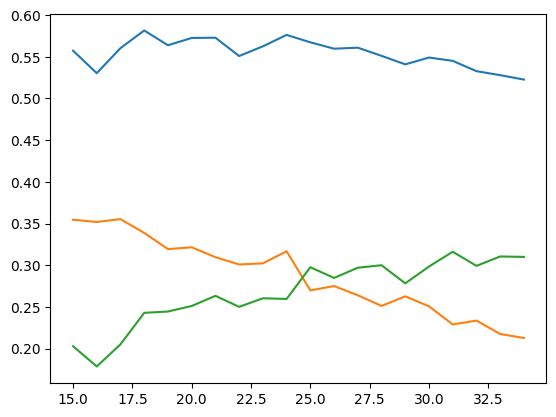

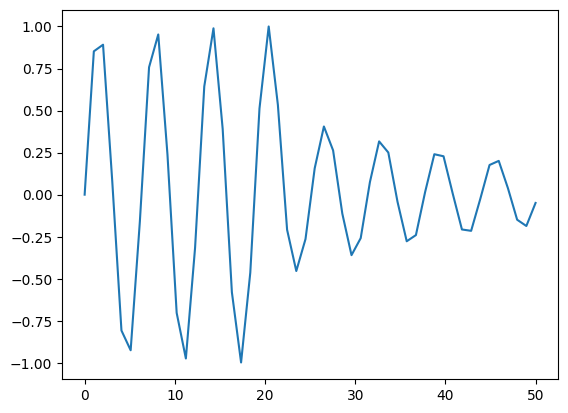

In [26]:

X = []
Y = []
Y1 = []
Y2 = []
for xc in range(15,35):
    model = Linear()
    trained_model = train(model,100,inp,out,xc)
    metric_1, metric_2 = get_metrics(trained_model,inp,out,xc)
    print('xc = ',xc)
    print('metric_1 = ',metric_1)
    print('metric_2 = ',metric_2)
    print('metric_1-metric_2 = ',abs(metric_1-metric_2))
    X.append(xc)
    Y.append(abs(metric_1-metric_2))
    Y1.append(metric_1)
    Y2.append(metric_2)
print(XC[0][0])
plt.plot(X,Y1,label='mae_model_1')
plt.plot(X,Y2,label='mae_model_2')
plt.legend()
plt.plot(X,Y)
plt.show()
plt.plot(inp[0][0],out[0][0])
plt.show()

In [10]:
from utils import get_metrics, train
X = []
Y = []
Y1 = []
Y2 = []
for xc in range(15,35):
    model = Linear()
    trained_model = train(model,200,inp,out,XC)
    metric_1, metric_2 = get_metrics(trained_model,inp,out,XC)
    print('xc = ',xc)
    print('metric_1 = ',metric_1)
    print('metric_2 = ',metric_2)
    print('metric_1-metric_2 = ',abs(metric_1-metric_2))
    X.append(xc)
    Y.append(abs(metric_1-metric_2))
    Y1.append(metric_1)
    Y2.append(metric_2)
print('O valor de divisão xc é {}.'.format(XC[0][0]))
plt.plot(X,Y)
plt.plot(X,Y1,label='mae_model_1')
plt.plot(X,Y2,label='mae_model_2')
plt.legend()
plt.show()
plt.plot(inp[0][0],out[0][0])
plt.show()

TypeError: '<=' not supported between instances of 'Tensor' and 'numpy.ndarray'

In [8]:
model = Linear()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
xc = rd.randint(0, 50)
print(xc)
epochs = 2000
for epoch in range(epochs):
    rnd_n = rd.randint(0,n-1)
    rnd_b = rd.randint(0,n_b-1)
    x = inp[rnd_n][rnd_b]
    y = out[rnd_n][rnd_b]
    x1=[]
    x2=[]
    y1=[]
    y2=[]
    for k in range(50):
        if x[k] <= xc:
            x1.append(x[k])
            y1.append(y[k])
        else:
            x2.append(x[k])
            y2.append(y[k])
    x1 = np.array(x1)
    x1 = torch.tensor(x1)
    x1 = x1.reshape(len(x1),1).float()
    x2 = np.array(x2)
    x2 = torch.tensor(x2)
    x2 = x2.reshape(len(x2),1).float()
    y1 = np.array(y1)
    y1 = torch.tensor(y1)
    y1 = y1.reshape(len(y1),1).float()
    y2 = np.array(y2)
    y2 = torch.tensor(y2)
    y2 = y2.reshape(len(y2),1).float()
    predict1 = model(x1,1)
    loss = torch.sum((predict1-y1)**2)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss.item())

    predict2 = model(x2,2)
    loss = torch.sum((predict2-y2)**2 )
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss.item())

24
225.0260772705078
219.27842712402344
82.9083480834961
23.635360717773438
20.70465850830078
128.96246337890625
9.578947067260742
62.78076934814453
25.79929542541504
2.7467565536499023
46.919620513916016
32.770843505859375
42.635162353515625
48.69485855102539
35.74583435058594
34.54602813720703
22.293882369995117
13.031700134277344
9.218039512634277
8.430421829223633
12.351851463317871
24.742952346801758
13.676969528198242
17.568422317504883
17.087629318237305
3.8229501247406006
13.620190620422363
1.8467918634414673
17.60319709777832
18.190637588500977
14.36512565612793
13.501433372497559
12.311750411987305
14.087198257446289
5.09222936630249
1.0212970972061157
12.289179801940918
4.708859920501709
14.250056266784668
9.99690055847168
14.234341621398926
8.824308395385742
13.33459758758545
6.941821098327637
9.888555526733398
2.368618965148926
7.644465923309326
2.96099853515625
12.12912654876709
11.93031120300293
12.130378723144531
2.201878309249878
11.80068302154541
2.7679123878479004
5.

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

x = inp[0][0]
y = out[0][0]
x1=[]
x2=[]
y1=[]
y2=[]
for k in range(50):
    if x[k] <= xc:
        x1.append(x[k])
        y1.append(y[k])
    else:
        x2.append(x[k])
        y2.append(y[k])
x1 = np.array(x1)
x1 = torch.tensor(x1)
x1 = x1.reshape(len(x1),1).float()
x2 = np.array(x2)
x2 = torch.tensor(x2)
x2 = x2.reshape(len(x2),1).float()
y1 = np.array(y1)
y1 = torch.tensor(y1)
y1 = y1.reshape(len(y1),1).float()
y2 = np.array(y2)
y2 = torch.tensor(y2)
y2 = y2.reshape(len(y2),1).float()
predict1 = model(x1,1).detach().numpy()
predict2 = model(x2,2).detach().numpy()

y1 = y1.detach().numpy().reshape(1,len(y1))
y2 = y2.detach().numpy().reshape(1,len(y2))
predict1 = predict1.reshape(1,len(predict1))
predict2 = predict2.reshape(1,len(predict2))


print(y1)
print(y2)
print(predict1)
print(predict2)

MSE_1 = mean_squared_error(predict1, y1)
RMSE_1 = mean_squared_error(predict1, y1,squared=False)
MAE_1 = mean_absolute_error(predict1, y1)

MSE_2 = mean_squared_error(predict2, y2)
RMSE_2 = mean_squared_error(predict2, y2,squared=False)
MAE_2 = mean_absolute_error(predict2, y2)



[[ 0.          0.85232157  0.89155924  0.08028167 -0.80758166 -0.9250414
  -0.16004509  0.75762844  0.95255184  0.23877531 -0.70278424 -0.9739131
  -0.3159641   0.6434032   0.9889871   0.3911132  -0.57986856 -0.9976767
  -0.4637374   0.5125906   0.99992573  0.53336793 -0.44200355 -0.9957197 ]]
[[-0.59955525  0.36856312  0.98508567  0.66187215 -0.2927434  -0.9680923
  -0.7199162   0.21503389  0.9448495   0.77331287 -0.13593619 -0.35236502
  -0.30775553  0.02039486  0.3121737   0.29844522  0.00818554 -0.27426618
  -0.28692254 -0.0323514   0.23875724  0.27366117  0.05247631 -0.20571518
  -0.25908443 -0.06892642]]
[[-0.01028574  0.9050697   0.8210873  -0.07857209 -0.4846319  -0.40086454
  -0.21346533 -0.06242113  0.04292218  0.10941145  0.14648443  0.16227037
   0.1629926   0.15315753  0.13594258  0.11356401  0.08755898  0.05899548
   0.02861487 -0.00307119 -0.03570068 -0.06901419 -0.10282862 -0.13701189]]
[[ 4.0251646e-02  3.7176047e-02  3.3757601e-02  3.0067358e-02
   2.6159678e-02  2.20

In [10]:
print('MSE_1 = {}'.format(MSE_1))
print('RMSE_1 = {}'.format(RMSE_1))
print('MAE_1 = {}'.format(MAE_1))
print('-----------------------------')
print('MSE_2 = {}'.format(MSE_2))
print('RMSE_2 = {}'.format(RMSE_2))
print('MAE_2 = {}'.format(MAE_2))
print('-----------')
print(xc)
print(XC[0][0])



MSE_1 = 0.3990170955657959
RMSE_1 = 0.5293834209442139
MAE_1 = 0.5293834209442139
-----------------------------
MSE_2 = 0.2222667634487152
RMSE_2 = 0.36814090609550476
MAE_2 = 0.36814090609550476
-----------
24
[35]


In [13]:
from utils import get_metrics, train
model = Linear()
print(abs(MAE_1-MAE_2))
while abs(MAE_1-MAE_2) >0.02:
    if MAE_1>MAE_2:
        xc-=1
    if MAE_1<MAE_2:
        xc+=1
    trained_model = train(model,200,inp,out,xc)
    metric_1, metric_2 = get_metrics(trained_model,inp,out,xc)
    MAE_1 = metric_1[2]
    MAE_2 = metric_2[2]
    print(MAE_1)
    print(MAE_2)
    

0.16124251
12.671712875366211
0.13147202134132385
152.10299682617188
88.7668685913086
14.572498321533203
3.176703691482544
39.28400802612305
26.097158432006836
75.70166015625
44.15489196777344
36.59381866455078
18.068593978881836
16.097421646118164
0.16009673476219177
15.163824081420898
9.188940048217773
30.08030128479004
17.988183975219727
25.3807373046875
10.207746505737305
13.31751823425293
1.1725351810455322
15.703032493591309
2.5917954444885254
17.065021514892578
7.587884902954102
18.406349182128906
5.642889022827148
14.433619499206543
0.8938589096069336
12.444085121154785
0.6604712605476379
5.363390922546387
3.156010866165161
13.412174224853516
2.669220447540283
12.697057723999023
0.5501707792282104
18.717180252075195
3.261014461517334
3.5910158157348633
1.5298717021942139
17.767297744750977
1.2140473127365112
8.037651062011719
0.12864923477172852
5.681766510009766
0.31067076325416565
6.679426193237305
0.8816084265708923
8.540376663208008
0.49698498845100403
13.024042129516602
0.

ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required.

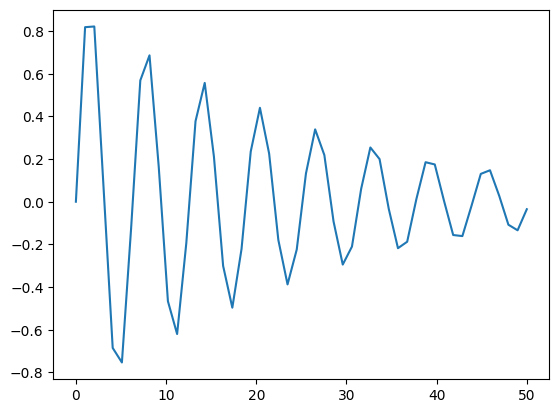

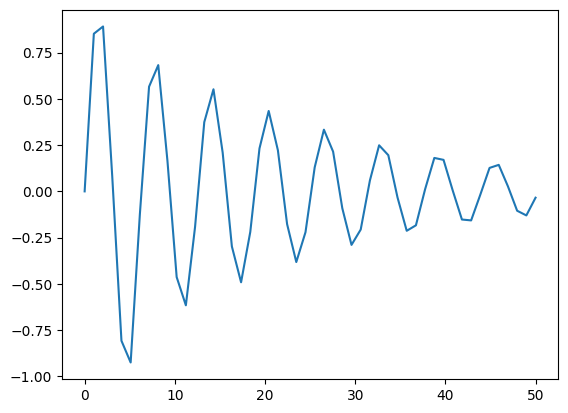

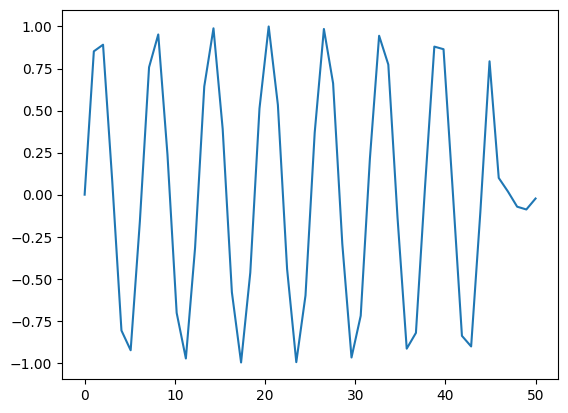

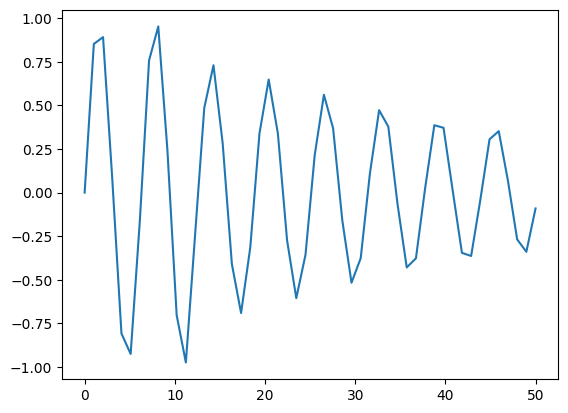

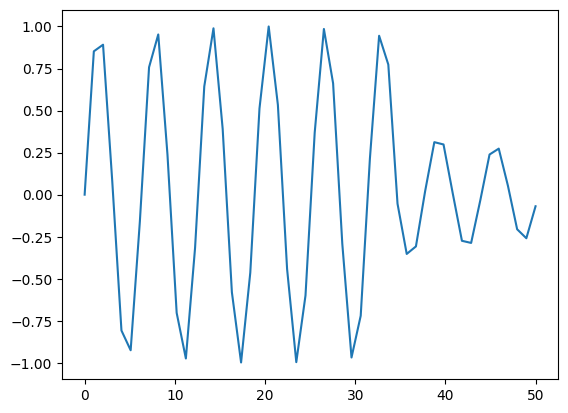

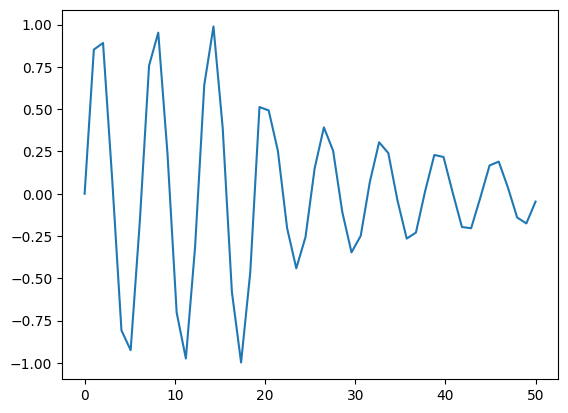

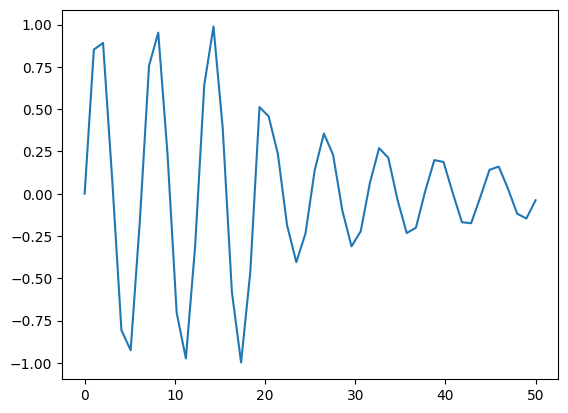

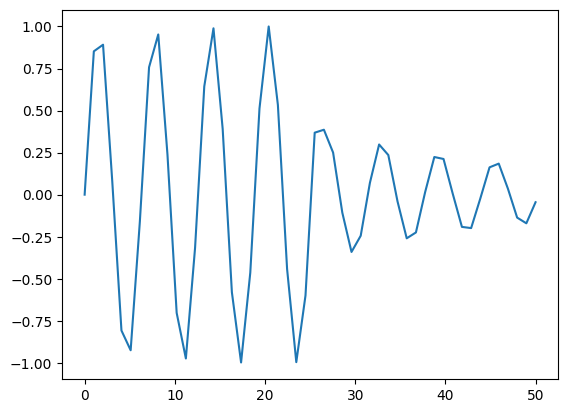

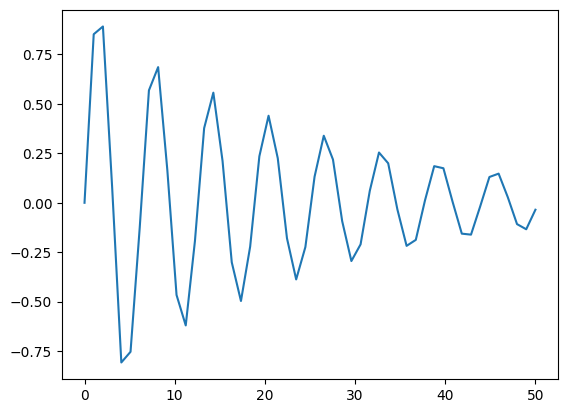

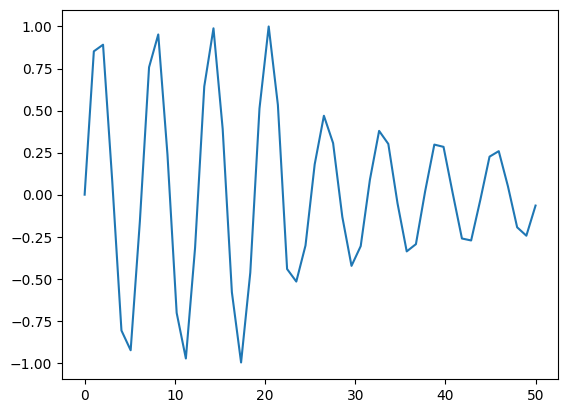

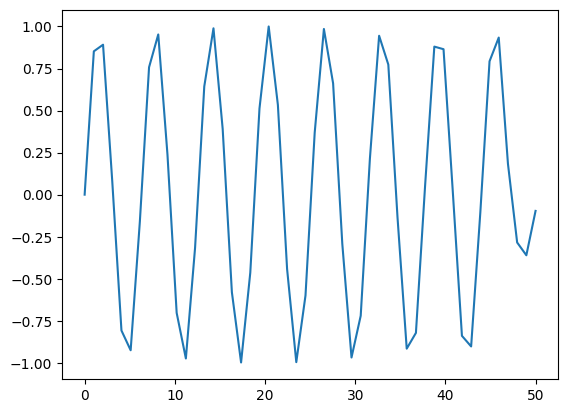

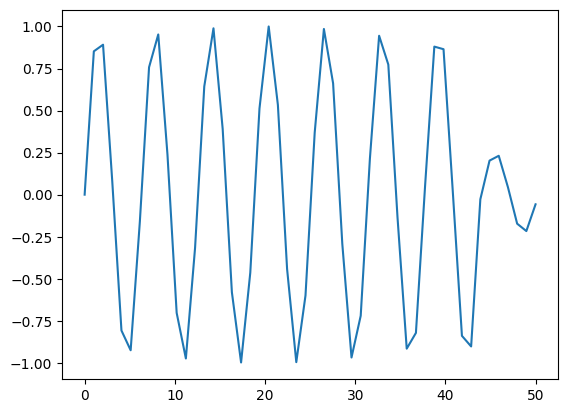

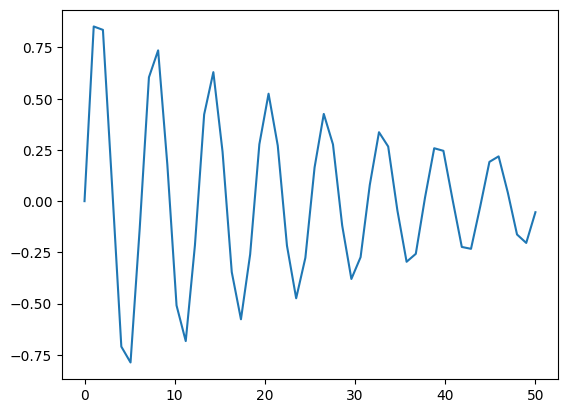

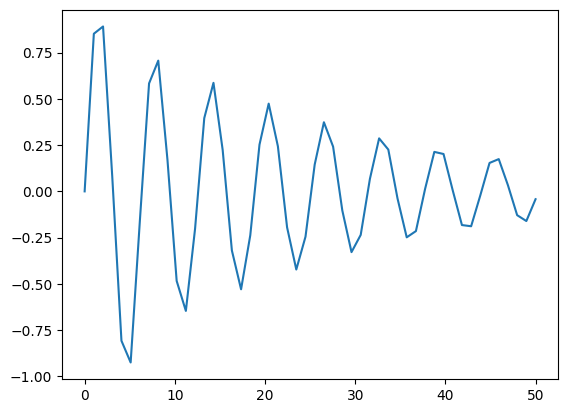

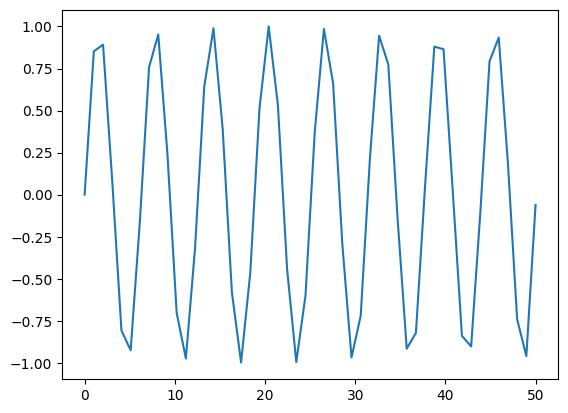

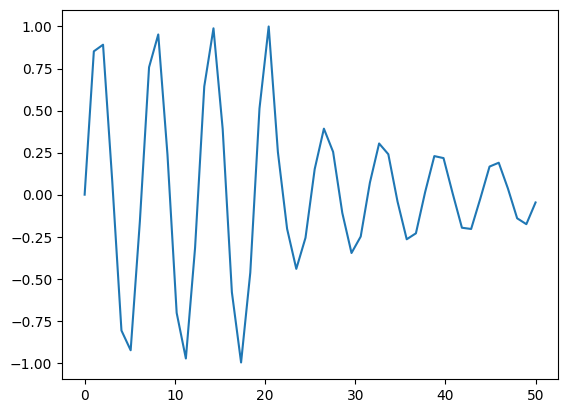

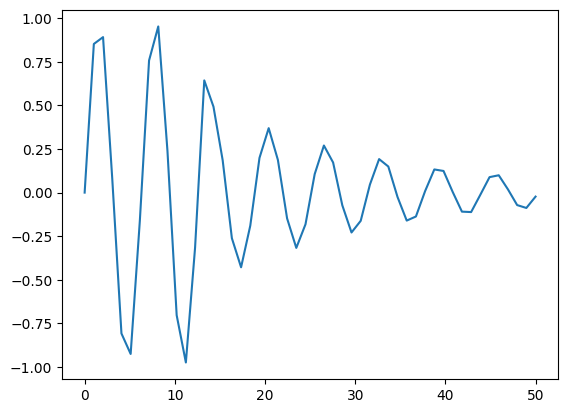

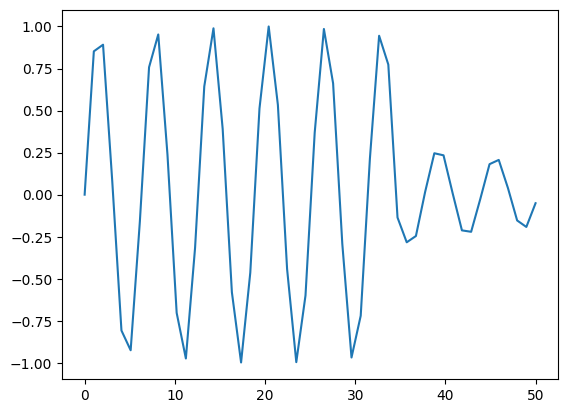

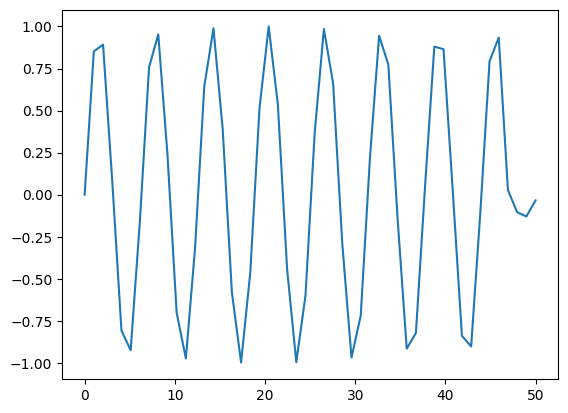

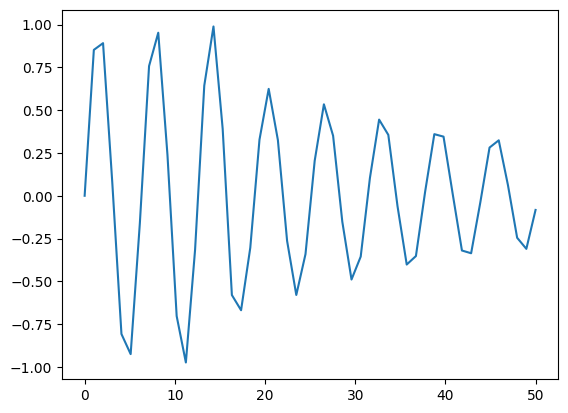

In [15]:
inp = pickle.load(open("inp", "rb"))
out = pickle.load(open("out", "rb"))
for i in(range(0,20)):
    plt.plot(inp[0][i], out[0][i])
    plt.show()

In [7]:
inp = pickle.load(open("inp", "rb"))
out = pickle.load(open("out", "rb"))
p1 = inp.reshape(200,50)

for i in np.shape(p1):
    for i in XC:


# 
# DEFINE O MODELO
# 

In [5]:
model_1 = Linear()
for m in model_1.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.orthogonal_(m.weight)
criterion = nn.MSELoss()  # segundo a investigar
# ,lr=1e-4,weight_decay = 1e-5)
optimizer = torch.optim.Adam(model_1.parameters())

model_2 = Linear()
for m in model_2.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.orthogonal_(m.weight)
criterion = nn.MSELoss()  # segundo a investigar
# ,lr=1e-4,weight_decay = 1e-5)
optimizer = torch.optim.Adam(model_2.parameters())

# Função de treino

In [7]:
def treine(model, inp, out, epochs):
    n_batch = np.shape(inp)[0]
    batch_size = np.shape(inp)[1]
    n_examples = np.shape(inp)[2]
    inp = torch.as_tensor(inp.reshape(
        1, int(n_examples*n_batch*batch_size), 1))
    out = torch.as_tensor(out.reshape(
        1, int(n_examples*n_batch*batch_size), 1))
    n_batch = np.shape(inp)[0]
    batch_size = np.shape(inp)[1]
    n_examples = np.shape(inp)[2]
    for epoch in range(epochs):
        for n_batch_idx in range(n_batch):
            I = inp[n_batch_idx]
            A = out[n_batch_idx]
            # plt.plot(I,A)
            # plt.show()
            I = I.float()
            A = A.float()
            recon = model(I)
            loss = torch.mean((recon-A)**2)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # s.exit()
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')


treine(model_1, inp1, out1, 500)


Epoch:1,Loss:0.6019
Epoch:2,Loss:0.6019
Epoch:3,Loss:0.6019
Epoch:4,Loss:0.6019
Epoch:5,Loss:0.6019
Epoch:6,Loss:0.6019
Epoch:7,Loss:0.6019
Epoch:8,Loss:0.6019
Epoch:9,Loss:0.6019
Epoch:10,Loss:0.6019
Epoch:11,Loss:0.6019
Epoch:12,Loss:0.6019
Epoch:13,Loss:0.6019
Epoch:14,Loss:0.6019
Epoch:15,Loss:0.6019
Epoch:16,Loss:0.6019
Epoch:17,Loss:0.6019
Epoch:18,Loss:0.6019
Epoch:19,Loss:0.6019
Epoch:20,Loss:0.6019
Epoch:21,Loss:0.6019
Epoch:22,Loss:0.6019
Epoch:23,Loss:0.6019
Epoch:24,Loss:0.6019
Epoch:25,Loss:0.6019
Epoch:26,Loss:0.6019
Epoch:27,Loss:0.6019
Epoch:28,Loss:0.6019
Epoch:29,Loss:0.6019
Epoch:30,Loss:0.6019
Epoch:31,Loss:0.6019
Epoch:32,Loss:0.6019
Epoch:33,Loss:0.6019
Epoch:34,Loss:0.6019
Epoch:35,Loss:0.6019
Epoch:36,Loss:0.6019
Epoch:37,Loss:0.6019
Epoch:38,Loss:0.6019
Epoch:39,Loss:0.6019
Epoch:40,Loss:0.6019
Epoch:41,Loss:0.6019
Epoch:42,Loss:0.6019
Epoch:43,Loss:0.6019
Epoch:44,Loss:0.6019
Epoch:45,Loss:0.6019
Epoch:46,Loss:0.6019
Epoch:47,Loss:0.6019
Epoch:48,Loss:0.6019
E

In [22]:
interval = 200
Dataset(1,1,interval)

XC = (1, 1, 1)
inp = torch.Size([1, 1, 200]) 1 conjunto(s) de 1 exemplos, cada um com 200 pontos 
out = torch.Size([1, 1, 200])


In [22]:
interval = 33
test = pickle.load(open("inp1", "rb")).reshape(1,interval,1).float()
recon = model(test).reshape(1,1,interval)

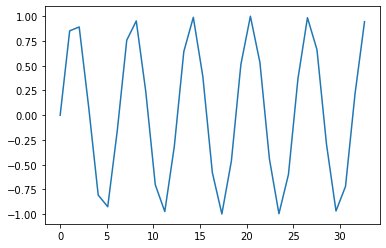

In [40]:
interval = 33
inp1 = pickle.load(open("inp1", "rb"))
out1 = pickle.load(open("out1", "rb"))
x=[]
y=[]
x = inp1.reshape(1,1,interval)
y = out1.reshape(1,1,interval)
plt.plot(x[0][0], y[0][0])
plt.show()

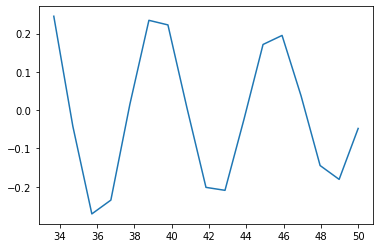

In [41]:
interval = 17
inp2 = pickle.load(open("inp2", "rb"))
out2 = pickle.load(open("out2", "rb"))
x=[]
y=[]
x = inp2.reshape(1,1,interval)
y = out2.reshape(1,1,interval)
plt.plot(x[0][0], y[0][0])
plt.show()

ValueError: x and y must have same first dimension, but have shapes torch.Size([17]) and (33,)

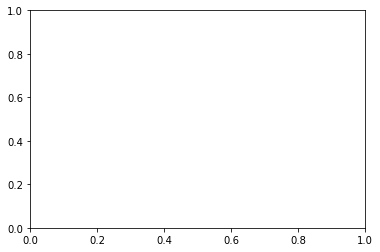

In [43]:
y = recon.detach().numpy()
x = inp2.reshape(1,1,interval)
plt.plot(x[0][0], y[0][0])
plt.show()

ValueError: x and y must have same first dimension, but have shapes torch.Size([17]) and (33,)

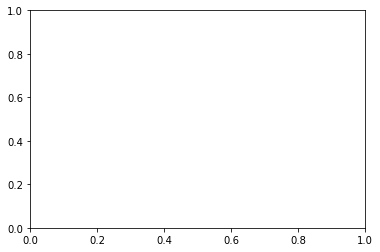

In [35]:
interval = 17
y = recon.detach().numpy()
#y = y2[::17]
x = inp2#.reshape(1,1,interval)
plt.plot(x[0][0], y[0][0])
plt.show()

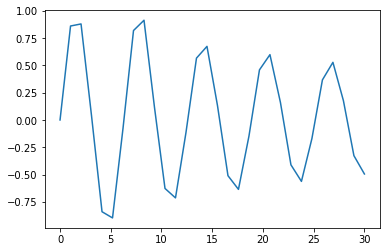

tensor([ 0.0000,  0.8596,  0.8785,  0.0381, -0.8395, -0.8960, -0.0762,  0.8182,
         0.9123,  0.1142, -0.6265, -0.7129, -0.1141,  0.5658,  0.6733,  0.1325,
        -0.5097, -0.6349, -0.1476,  0.4580,  0.5977,  0.1597, -0.4104, -0.5618,
        -0.1693,  0.3666,  0.5272,  0.1765, -0.3264, -0.4940])
--------------------
tensor([ 0.0000,  0.8596,  0.8785,  0.0381, -0.8395, -0.8960, -0.0762,  0.8182,
         0.9123,  0.1142, -0.6265, -0.7129, -0.1141,  0.5658,  0.6733,  0.1325,
        -0.5097, -0.6349, -0.1476,  0.4580,  0.5977,  0.1597, -0.4104, -0.5618,
        -0.1693,  0.3666,  0.5272,  0.1765, -0.3264, -0.4940])
--------------------
tensor([ 0.0000,  1.0345,  2.0690,  3.1034,  4.1379,  5.1724,  6.2069,  7.2414,
         8.2759,  9.3103, 10.3448, 11.3793, 12.4138, 13.4483, 14.4828, 15.5172,
        16.5517, 17.5862, 18.6207, 19.6552, 20.6897, 21.7241, 22.7586, 23.7931,
        24.8276, 25.8621, 26.8966, 27.9310, 28.9655, 30.0000])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x30 and 1x300)

In [24]:
def treine(epochs):
    inp = pickle.load(open("inp", "rb"))
    out = pickle.load(open("out", "rb"))
    n_batch = np.shape(inp)[0]
    batch_size = np.shape(inp)[1]
    n_examples = np.shape(inp)[2]
    for epoch in range(epochs):
        for batch_idx in range(n_batch):
            I = inp[batch_idx]
            A = out[batch_idx]
            plt.plot(I[0],A[0])
            plt.show()
            I = I.float()
            A = A.float()
            print(A[0])
            print('-'*20)
            print(A[0])
            print('-'*20)
            for i in I:
                for j in range(len(n_examples)):
                    print(i)
                    recon, latent = model(i[j])
                    loss = torch.mean((recon-A)**2)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')
        s.exit()



treine(200)
# print('end')
# -------------------------------------------------------------------------------
# --------------------- SALVANDO-------------------------------------------------
# -------------------------------------------------------------------------------
# PATH_save='Estado_Box_2_with_two_latent.pt'
##PATH_load = 'Estado_Box_2_with_two_latent.pt'
#torch.save(model.state_dict(), PATH_save)
# s.exit()
##model.load_state_dict(torch.load(PATH_load))
#torch.save(model.state_dict(), PATH_save)


# 
# GRÁFICOS
# 

In [ ]:
#inp = pickle.load(open("inp", "rb"))
#out = pickle.load(open("out", "rb"))


In [ ]:
def Latent_values_Scynet():
    for aux in range(n_batch):
        O = inp[aux].float()
        Q = question[aux].float()
        A = out[aux].float()
        j = J[aux]
        x = np.zeros(np.shape(j)[0])
        y1 = np.zeros(np.shape(j)[0])
        y2 = np.zeros(np.shape(j)[0])
        recon, latent = model(O, Q)
        for i in range(0, 499):
            x[i] = j[i]
            y1[i] = latent[i, 0]
            y2[i] = latent[i, 1]
        plt.scatter(x, y1, label='Latent Activation 1')
        plt.scatter(x, y2, label='Latent Activation 2')
        plt.xlabel('Momento angular total')
        plt.ylabel('Latent Activation')
        plt.legend()
        plt.pause(1.5)
        plt.close()

    plt.show()


Latent_values_Scynet()
# s.exit()
# -------------------------------------------------------------------------------


# An approach to predict when the prelude of mitosis occur